# Clean Data


In [163]:
import pandas as pd
import numpy as np
import datetime as dt
# Load the data
data = pd.read_csv('Apple462.csv')





data = data[data['region'] == 'Spain']

data['Envi'] = data['Envi'].replace(' ', np.nan)
data['Gala'] = data['Gala'].replace(' ', np.nan)
data ['Fuji'] = data['Fuji'].replace(' ', np.nan)


# nan_values = data['Envi'].isnull().sum()
# print("Number of NaN values in 'Envi' column:", nan_values)


data['Envi'] = data['Envi'].astype(float)
data['Envi'] = data['Envi'].fillna(data['Envi'].mean())
data['Gala'] = data['Gala'].astype(float)
data['Gala'] = data['Gala'].fillna(data['Gala'].mean())
data['Fuji'] = data['Fuji'].astype(float)
data['Fuji'] = data['Fuji'].fillna(data['Fuji'].mean())
# Convert "Date" column to datetime format
# data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# data = data.sort_values('Date', ascending=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Date'] = data['Date'].map(dt.datetime.toordinal)




nan_values = data['Envi'].isnull().sum()
print("Number of NaN values in 'Envi' column:", nan_values)

data

Number of NaN values in 'Envi' column: 0


,Unnamed: 0,Date,Envi,Fuji,Gala,region
0,0,735959,1037.0,54455.0,48.0,Spain
1,1,735952,674.0,44639.0,58.0,Spain
2,2,735945,795.0,109150.0,131.0,Spain
3,3,735938,1132.0,71976.0,73.0,Spain
4,4,735931,941.0,43838.0,76.0,Spain
...,...,...,...,...,...,...
3304,7,736729,7626.0,195725.0,144.0,Spain
3305,8,736722,3101.0,74627.0,56.0,Spain
3306,9,736715,3133.0,116521.0,89.0,Spain
3307,10,736708,2897.0,76571.0,44.0,Spain


# Gradient boosting

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = data[['Date']]
y = data['Envi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=320)

# Create and train the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.8, max_depth=1, random_state=320)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


print(model.score(X_test, y_test))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


0.7728919535446486
Mean Squared Error: 4852191.7857993385


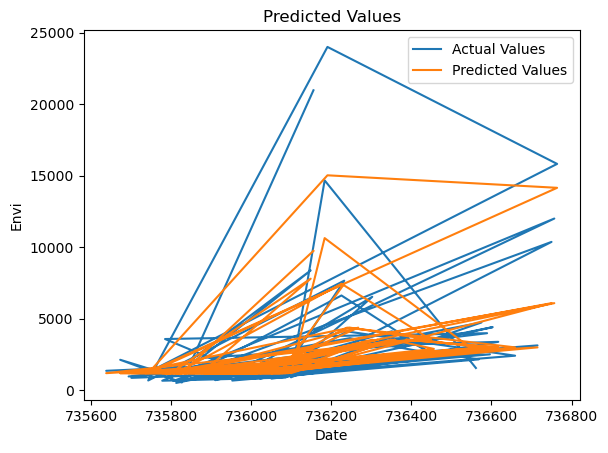

In [165]:
import matplotlib.pyplot as plt
# Visualize the predicted values
plt.plot(X['Date'], y_test, label='Actual Values')
plt.plot(X_test['Date'], y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Envi')
plt.title('Predicted Values')
plt.legend()
plt.show()

In [166]:
# Input the date
input_date = pd.to_datetime('2024-01-01', format='%Y-%m-%d')  # Replace '2024-01-01' with the desired date
#27/12/2015
# Convert the input date to the ordinal format
input_date_ordinal = input_date.toordinal()

# Predict the Envi value for the input date
predicted_envi = model.predict([[input_date_ordinal]])

print(predicted_envi[0])

15394.730534145161


/usr/local/anaconda3/envs/datascience/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
